In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('laptop_data.csv')

# print(df)
# shows extra column named "Unnamed: 0"

df.drop(columns = ["Unnamed: 0"], inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [35]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [36]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [37]:
df.duplicated().sum()

29

In [38]:
df.drop_duplicates(inplace = True)

In [39]:
df.describe()

,Inches,Price
count,1274.000000,1274.000000
mean,15.022449,60503.185074
std,1.429940,37333.222977
min,10.100000,9270.720000
25%,14.000000,32495.605200
50%,15.600000,52693.920000
75%,15.600000,79773.480000
max,18.400000,324954.720000


C:\Users\Kinjal\AppData\Local\Temp\ipykernel_20732\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

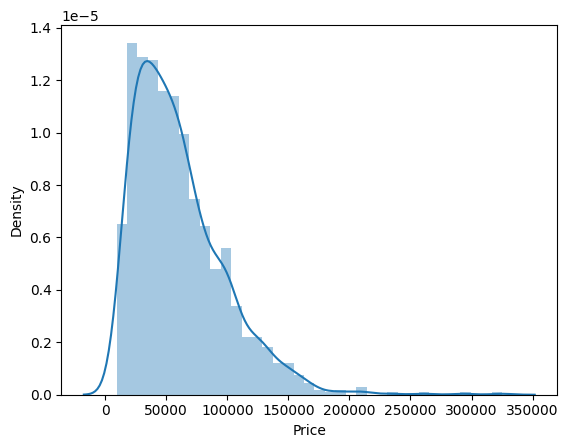

In [40]:
sns.distplot(df["Price"])

In [41]:
df[["Company", "Price"]]

,Company,Price
0,Apple,71378.6832
1,Apple,47895.5232
2,HP,30636.0000
3,Apple,135195.3360
4,Apple,96095.8080
...,...,...
1269,Asus,38378.6496
1270,Lenovo,33992.6400
1271,Lenovo,79866.7200
1272,Lenovo,12201.1200


In [42]:
df[["Company"]].value_counts()

Company  
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
Name: count, dtype: int64

In [43]:
df[["Company","Price"]].groupby("Company").mean().reset_index()
# reset index is just to bring back index column

,Company,Price
0,Acer,33750.986186
1,Apple,83340.499886
2,Asus,60143.988302
3,Chuwi,16745.726400
4,Dell,63894.714408
5,Fujitsu,38841.120000
6,Google,89386.080000
7,HP,57559.165307
8,Huawei,75870.720000
9,LG,111834.720000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Apple'),
  Text(2, 0, 'Asus'),
  Text(3, 0, 'Chuwi'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Fujitsu'),
  Text(6, 0, 'Google'),
  Text(7, 0, 'HP'),
  Text(8, 0, 'Huawei'),
  Text(9, 0, 'LG'),
  Text(10, 0, 'Lenovo'),
  Text(11, 0, 'MSI'),
  Text(12, 0, 'Mediacom'),
  Text(13, 0, 'Microsoft'),
  Text(14, 0, 'Razer'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Toshiba'),
  Text(17, 0, 'Vero'),
  Text(18, 0, 'Xiaomi')])

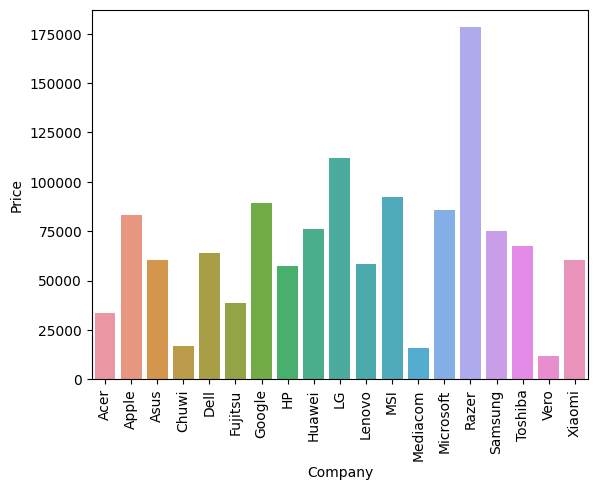

In [44]:
sns.barplot(data = df[["Company","Price"]].groupby("Company").mean().reset_index(), x ="Company", y="Price")
plt.xticks(rotation=90) # To rotate x axis names so they are readable


In [45]:
company_price = df[["Company","Price"]].groupby("Company").mean().reset_index().sort_values(by="Price", ascending = False)
company_price

,Company,Price
14,Razer,178282.491429
9,LG,111834.720000
11,MSI,92116.226133
6,Google,89386.080000
13,Microsoft,85903.788000
1,Apple,83340.499886
8,Huawei,75870.720000
15,Samsung,75308.320000
16,Toshiba,67549.050000
4,Dell,63894.714408


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Razer'),
  Text(1, 0, 'LG'),
  Text(2, 0, 'MSI'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Microsoft'),
  Text(5, 0, 'Apple'),
  Text(6, 0, 'Huawei'),
  Text(7, 0, 'Samsung'),
  Text(8, 0, 'Toshiba'),
  Text(9, 0, 'Dell'),
  Text(10, 0, 'Xiaomi'),
  Text(11, 0, 'Asus'),
  Text(12, 0, 'Lenovo'),
  Text(13, 0, 'HP'),
  Text(14, 0, 'Fujitsu'),
  Text(15, 0, 'Acer'),
  Text(16, 0, 'Chuwi'),
  Text(17, 0, 'Mediacom'),
  Text(18, 0, 'Vero')])

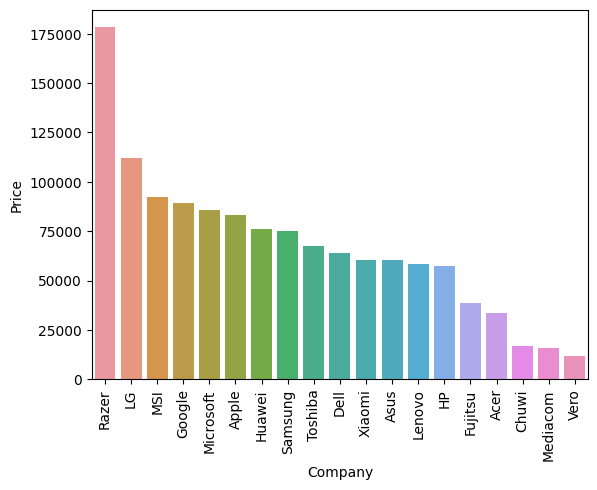

In [46]:
sns.barplot(data = company_price, x ="Company", y="Price")
plt.xticks(rotation=90) 

In [47]:
df["Ram"].value_counts()

Ram
8GB     613
4GB     366
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: count, dtype: int64

In [48]:
df["Ram"] = df["Ram"].apply(lambda x: x[:-2])
# df["Ram"].apply(lambda x: int(x.replace("GB","")))
df["Weight"] = df["Weight"].apply(lambda x: x[:-2])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200


In [ ]:
df[["Ram","Weight","Price"]].corr() # correlation matrix

,Ram,Weight,Price
Ram,1.000000,0.389658,0.740106
Weight,0.389658,1.000000,0.212192
Price,0.740106,0.212192,1.000000


<Axes: xlabel='Ram', ylabel='Price'>

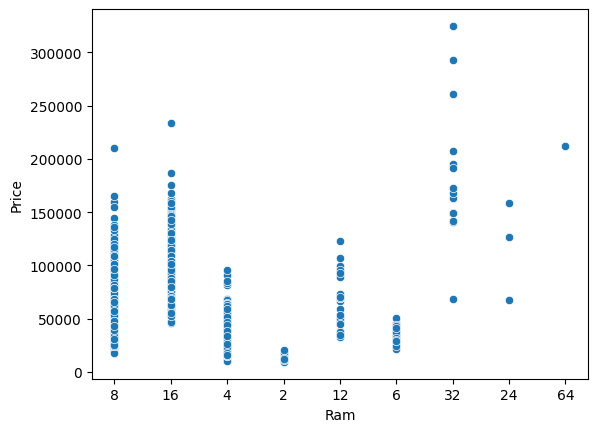

In [50]:
sns.scatterplot(data=df[["Ram","Weight","Price"]], x="Ram", y="Price")

<Axes: xlabel='Weight', ylabel='Price'>

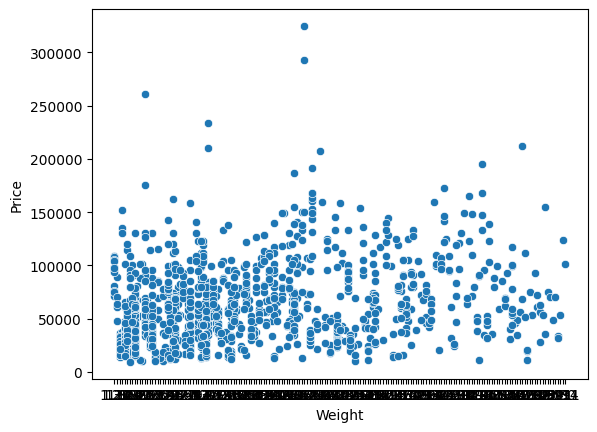

In [51]:
sns.scatterplot(data=df[["Ram","Weight","Price"]], x="Weight", y="Price")

<Axes: xlabel='Ram', ylabel='Price'>

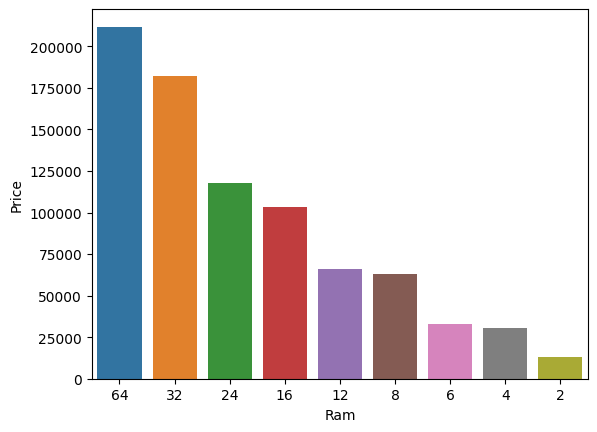

In [55]:
ram_data = df[["Ram","Price"]].groupby("Ram").mean().reset_index().sort_values(by = "Price", ascending = False)

sns.barplot(data=ram_data, x="Ram", y="Price")

In [56]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [57]:
def fetch_screen_type(value):
    if "Touchscreen" in value:
        return "Touchscreen"
    elif "IPS" in value:
        return "IPS"
    else:
        return "Other"
    
df["Screen_Type"] = df["ScreenResolution"].apply(fetch_screen_type)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,Other
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Touchscreen
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Touchscreen
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,Other


In [61]:
df[["Screen_Type","Price"]].groupby("Screen_Type").mean().reset_index()

,Screen_Type,Price
0,IPS,76730.919809
1,Other,51046.868124
2,Touchscreen,77422.131574


In [62]:
def fetch_screen_size(value):
    return value.split(" ")[-1]
    
df["Screen_Size"] = df["ScreenResolution"].apply(fetch_screen_size)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Type,Screen_Size
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,Other,1366x768
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Touchscreen,1920x1080
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Touchscreen,3200x1800
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,Other,1366x768


In [63]:
df[["Screen_Size","Price"]].groupby("Screen_Size").mean().reset_index()

,Screen_Size,Price
0,1366x768,29398.165487
1,1440x900,55339.804800
2,1600x900,35922.163617
3,1920x1080,65459.678798
4,1920x1200,24064.125120
5,2160x1440,75870.720000
6,2256x1504,85903.788000
7,2304x1440,68193.072000
8,2400x1600,75817.440000
9,2560x1440,119580.728557


In [64]:
df["x_size"] = df["Screen_Size"].apply(lambda x:x.split("x")[0])
df["y_size"] = df["Screen_Size"].apply(lambda x:x.split("x")[-1])
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Type,Screen_Size,x_size,y_size
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,2560x1600,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,Other,1366x768,1366,768
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Touchscreen,1920x1080,1920,1080
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Touchscreen,3200x1800,3200,1800
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,Other,1366x768,1366,768


In [ ]:
df["diagonal_pixel"] = (df["x_size"].astype(int)**2 + df["y_size"].astype(int)**2)**0.5
df["ppi"]= df["diagonal_pixel"]/df["Inches"] # pixel per inch
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Type,Screen_Size,x_size,y_size,diagonal_pixel,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,2560x1600,2560,1600,3018.873962,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other,1440x900,1440,900,1698.116604,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,1920x1080,1920,1080,2202.907170,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,2880x1800,2880,1800,3396.233208,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,2560x1600,2560,1600,3018.873962,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,Other,1366x768,1366,768,1567.092850,100.454670
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Touchscreen,1920x1080,1920,1080,2202.907170,157.350512
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Touchscreen,3200x1800,3200,1800,3671.511950,276.053530
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,Other,1366x768,1366,768,1567.092850,111.935204


In [67]:
df[["Inches","diagonal_pixel","ppi","Price"]].corr()

,Inches,diagonal_pixel,ppi,Price
Inches,1.000000,-0.074402,-0.414395,0.066990
diagonal_pixel,-0.074402,1.000000,0.933337,0.551676
ppi,-0.414395,0.933337,1.000000,0.469539
Price,0.066990,0.551676,0.469539,1.000000


<Axes: xlabel='ppi', ylabel='Price'>

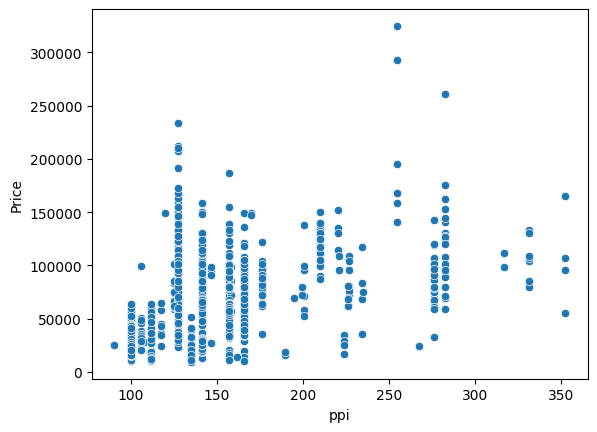

In [68]:
sns.scatterplot(data=df, x="ppi", y="Price")

c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kinjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\relational.py:441: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after grou

<Axes: xlabel='ppi', ylabel='Price'>

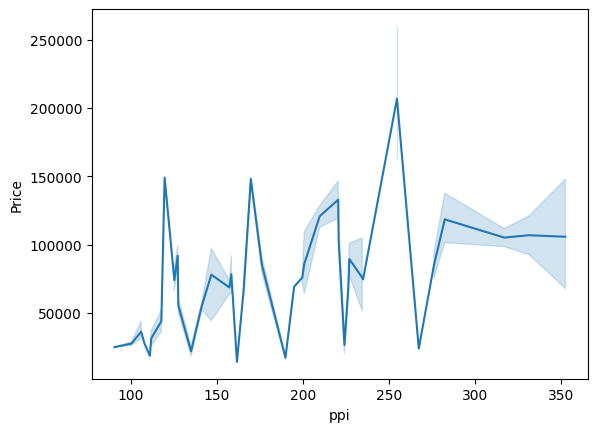

In [69]:
sns.lineplot(data=df, x="ppi", y="Price")

In [70]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [71]:
def fetch_os(value):
    if "Windows" in value:
        return "Windows"
    elif "mac" in value.lower():
        return "Mac"
    elif "Linux" in value:
        return "Linux"
    else:
        return "Other"
    
df["OS"] = df["OpSys"].apply(fetch_os)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Type,Screen_Size,x_size,y_size,diagonal_pixel,ppi,OS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS,2560x1600,2560,1600,3018.873962,226.983005,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Other,1440x900,1440,900,1698.116604,127.677940,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Other,1920x1080,1920,1080,2202.907170,141.211998,Other
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS,2880x1800,2880,1800,3396.233208,220.534624,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS,2560x1600,2560,1600,3018.873962,226.983005,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,Other,1366x768,1366,768,1567.092850,100.454670,Windows
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400,Touchscreen,1920x1080,1920,1080,2202.907170,157.350512,Windows
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200,Touchscreen,3200x1800,3200,1800,3671.511950,276.053530,Windows
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200,Other,1366x768,1366,768,1567.092850,111.935204,Windows


In [74]:
df[["OS","Price"]].groupby("OS").mean().reset_index().sort_values(by="Price", ascending = False)

,OS,Price
1,Mac,83340.499886
3,Windows,64089.981622
0,Linux,33133.077434
2,Other,30633.779065


<Axes: xlabel='OS', ylabel='Price'>

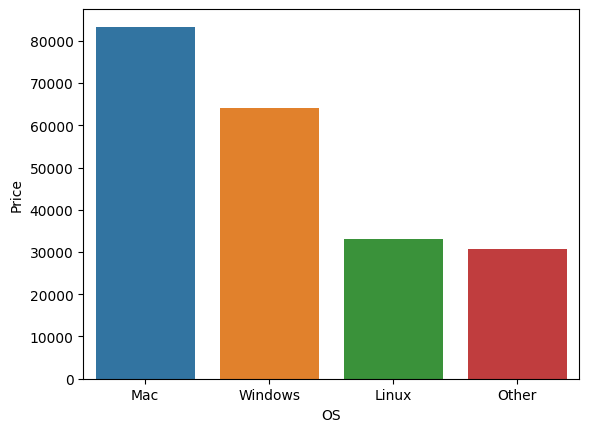

In [75]:
sns.barplot(data=df[["OS","Price"]].groupby("OS").mean().reset_index().sort_values(by="Price", ascending = False), x="OS", y="Price")

In [76]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         